In [3]:
%matplotlib inline
from dpm.train import train
from dpm.visualize import plot_model, plot_models, plot_hists, plot_hist, plot_mcmc
from dpm.distributions import Normal, Distribution, Gamma
import torch
from torch.distributions import Categorical
from torch.nn import Module, ModuleList
import numpy as np
import torch.distributions as dist
import matplotlib.pyplot as plt
from dpm.mixture_models import MixtureModel
from dpm.mcmc import metropolis_hastings

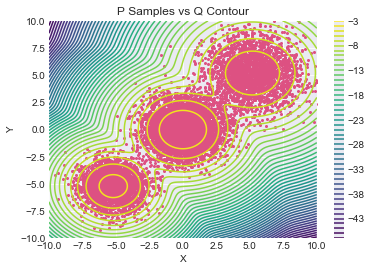

In [4]:
true = MixtureModel([Normal([5.2, 5.2], [[3.0, 0.0], [0.0, 3.0]]), 
                    Normal([0.0, 0.0], [[2.0, 0.0], [0.0, 2.0]]),
                    Normal([-5.2, -5.2], [[1.5, 0.0], [0.0, 1.5]])],
                    [0.25, 0.5, 0.25])

# true = Normal([2.3], [[2.0]])

plot_model(true)

In [5]:
samples = metropolis_hastings(true)

In [9]:
print(samples.mean(), samples.var())
print(len(samples))

true_samples = true.sample(len(samples)).detach()
print(true_samples.mean(), true_samples.var())
print(len(true_samples))

tensor(-0.7898) tensor(16.8163)
6061
tensor(0.0292) tensor(15.6934)
6061


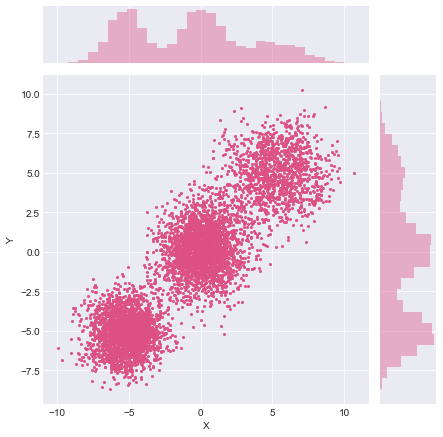

In [10]:
plot_hist(samples)

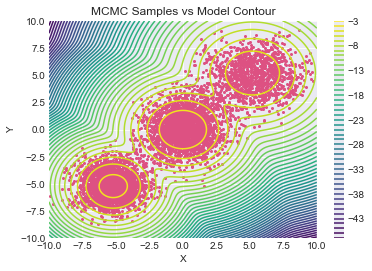

In [11]:
plot_hists(samples, true)

In [ ]:
plot_mcmc(samples)